# Lesson 9

In [2]:
# synthetic creadit card Fraud Dataset

from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

x_legit, y_legit = make_blobs(
    n_samples=900,
    centers = [[50, 30]],
    cluster_std=[15],
    random_state=42
)

y_legit[:] = 0

x_fraud, y_fraud = make_blobs(
    n_samples=100,
    centers=[[200, 80]],
    cluster_std=[20],
    random_state=99
)

y_fraud [:] = 1

X = np.vstack([x_legit, x_fraud])
y = np.hstack([y_legit, y_fraud])

print("X shape:", X.shape)
print("y shape:", y.shape)

df = pd.DataFrame(X, columns=["transaction_amount", "location_distance"])
df["fraud"] = y

print(df.head())
print(df.tail())



X shape: (1000, 2)
y shape: (1000,)
   transaction_amount  location_distance  fraud
0           86.686280          31.938318      0
1           68.257378          52.819741      0
2           40.808170          24.184477      0
3           47.723224          38.824758      0
4           57.364624          41.023167      0
     transaction_amount  location_distance  fraud
995          229.413367         100.326423      1
996          176.161317          91.054638      1
997          180.756630          80.893057      1
998          230.831974          96.812153      1
999          195.633231          61.006834      1


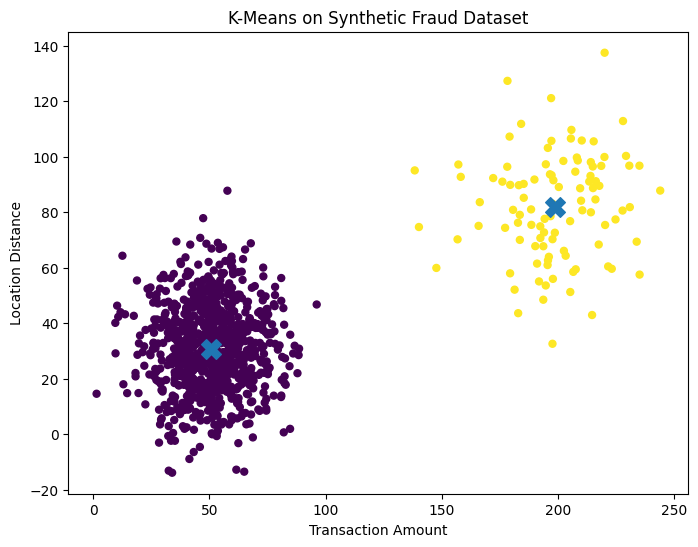

   transaction_amount  location_distance  real_label  cluster_label
0           86.686280          31.938318           0              0
1           68.257378          52.819741           0              0
2           40.808170          24.184477           0              0
3           47.723224          38.824758           0              0
4           57.364624          41.023167           0              0
5           58.896519          25.356803           0              0
6           47.493229          32.200705           0              0
7           72.168411          22.225947           0              0
8           61.209404          39.155554           0              0
9           21.938121          24.727298           0              0


In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
    
x_legit, y_legit = make_blobs(
    n_samples=900,
    centers = [[50, 30]],

    cluster_std=[15],
    random_state=42
)

y_legit[:] = 0

x_fraud, y_fraud = make_blobs(
    n_samples=100,
    centers=[[200, 80]],
    cluster_std=[20],
    random_state=99
)

y_fraud [:] = 1

X = np.vstack([x_legit, x_fraud])
y = np.hstack([y_legit, y_fraud])

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=25)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker="X")
plt.title("K-Means on Synthetic Fraud Dataset")
plt.xlabel("Transaction Amount")
plt.ylabel("Location Distance")
plt.show()


df = pd.DataFrame(X, columns=["transaction_amount", "location_distance"])
df["real_label"] = y                # 0 = legit, 1 = fraud
df["cluster_label"] = cluster_labels  # from KMeans

print(df.head(10))





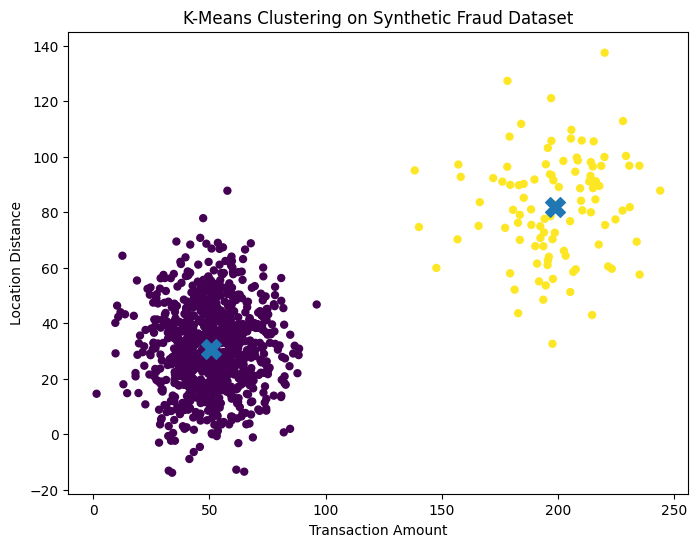

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(
    X[:, 0], 
    X[:, 1], 
    c=cluster_labels,     
    s=25                  
)


plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=200,
    marker='X'           
)

plt.title("K-Means Clustering on Synthetic Fraud Dataset")
plt.xlabel("Transaction Amount")
plt.ylabel("Location Distance")
plt.show()
